# Deep Learning

In [219]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## HW1- Problem 3 - Regression (100 pts)

### Please fill this part


1.   Full Name: 
2.   Student Number: 


*You are just allowded to change those parts that start with "TO DO". Please do not change other parts.*

*It is highly recommended to read each codeline carefully and try to understand what it exactly does. Best of luck and have fun!*

In [220]:
# You are not allowed to import other packages.

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error

### Part1:
Consider the dataset which has been given to you. Split the dataset into the `training dataset` and `test dataset`. You can use `80%` of the data for training and the rest for testing.

In [221]:
dataset = pd.read_csv("/content/drive/MyDrive/HW1/data/data01.csv")

# implement the split part
# name them: x_train, x_test, y_train, y_test
ds = pd.DataFrame(dataset , columns = ['X','Y'])
ds_array = ds.to_numpy()
ds_array.shape
np.random.seed(42)
ds_index = np.arange(0, len(ds_array))
ds_train_index = np.random.choice(ds_index,int(len(ds_array)*0.8),replace=False)
ds_train = ds_array[ds_train_index]
ds_test = np.delete(ds_array, ds_train_index, 0)
x_train = ds_train[:,0]
y_train = ds_train[:,1]
x_test = ds_test[:,0]
y_test = ds_test[:,1]

### Part2:
Assume there is simple linear relationship between X and Y. Train a simple `Linear Regression` on the training dataset and report its accuracy on the training and testing dataset, separately.

In [222]:
# here you can implement via sgd or use least square solution. we suggest the second one inv(A^T A) * A^T y.
# consider m as the returned line --> m[0] = the slope , m[1] = y intercept, also don't forget to use numpy for calculating m.
A = np.vstack((x_train, np.ones((len(x_train))))).T
m = np.matmul((np.linalg.inv(np.matmul(A.T,A))) , np.matmul(A.T,y_train))

In [223]:
predicted_train_y = m[0] * x_train + m[1]
predicted_test_y = m[0] * x_test + m[1]

train_error = mean_squared_error(predicted_train_y, y_train)
test_error = mean_squared_error(predicted_test_y, y_test)

print(f"MSE train error: {train_error}\nMSE test error: {test_error}")

MSE train error: 0.32910926545642
MSE test error: 0.3365156412134214


### Part3:
Draw the line you've found in the last part, on train and test points (each separately).

Text(0.5, 1.0, 'Train dataset')

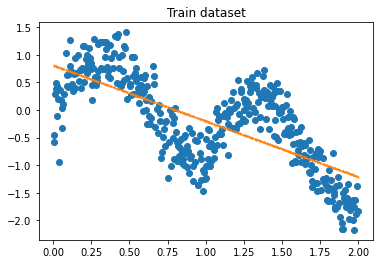

In [224]:
plt.scatter(x_train, y_train)
plt.scatter(x_train, m[0]*x_train + m[1], s=1)
plt.title("Train dataset")

Text(0.5, 1.0, 'Test dataset')

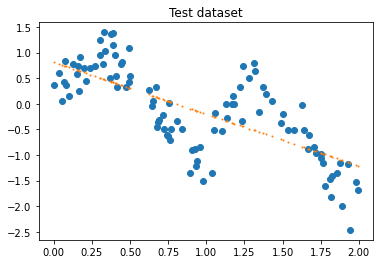

In [225]:
plt.scatter(x_test, y_test)
plt.scatter(x_test, m[0]*x_test + m[1], s=1)
plt.title("Test dataset")

### Part4:
Were the reported accuracies acceptable? NO

What about the line you drew in the last part?
NO. Few train and test points were on this line.

Was it appropriate for the dataset?
<br><br/>
NO

Explain what are the main problems here.

because this data set has big variance and few points were on the mean points, this method was not appropriate.

Because this data set has big variance and few points were on the mean points, this method was not appropriate.Linear Regression algorithm cannot be used for making predictions when there exists a non-linear relationship between X and Y.

### Part5:
Now, consider the `Locally Weighted Linear Regression` approach for this problem. Do expect it performs better than simple `Linear Regression` for this dataset?

Yes. Locally Weighted Linear Regression algorithm can be used for making predictions when there exists a non-linear relationship between X and Y but Linear Regression can not predict non-linear relationship.

### Part6:
Here, we want to implement the `suggested model`. You can implement any weight function you want, the below implementation is just a sample:
<br><br/>
\begin{equation*}
    w^{(i)}=exp\left(-\frac{(\mathbf x^{(i)}-\mathbf x)^\top(\mathbf x^{(i)}-\mathbf x)}{2\tau^2}\right)
\end{equation*}

In [226]:
def get_weight_matrix(the_query_point, train_dataset, hyperparameter):
    l = train_dataset.shape[0]
    W = np.mat(np.eye(l))
    for i, xi in enumerate(train_dataset):
        W[i, i] = np.exp((-np.matmul((xi - the_query_point),(xi - the_query_point).T))/(2*hyperparameter**2))
    return W

Now implement the `closed form solution` based on the following formula:
<br><br/>
\begin{equation*}
    \boldsymbol\theta=(X^\top WX)^{-1}(X^\top WY)
\end{equation*}
<br><br/>
Of course if you use another form, implement your own.

In [227]:
def predict(train_X, train_Y, query_x, hyperparameter):
    X = np.vstack((x_train, np.ones((len(x_train))))).T
    train_Y = np.mat(train_Y).T
    qx = np.array([query_x, 1])
    W = get_weight_matrix(qx, X, hyperparameter)
    theta = np.matmul((np.linalg.inv(np.matmul((np.matmul(X.T, W)), X))),np.matmul((np.matmul(X.T, W)), train_Y)) 
    return np.matmul(qx , theta)

### Part7:
Report accuracy of this model on the test dataset. Also, draw a plot that contains (x_test, y_test) pairs and (x_test, predicted_y) pairs that differ in color.

In [228]:
hyperparameter = 0.03
predicted_test = [predict(x_train, y_train, query, hyperparameter) for query in x_test]
error = mean_squared_error(np.asarray(predicted_test).reshape(-1), y_test)
print(f"MSE test error: {error}")

MSE test error: 0.09598132513292741


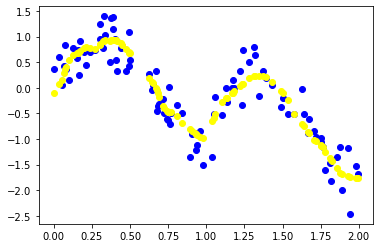

In [229]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_test, c="yellow")

### Part8:
Is the performance of the new model better than the previous one? `Explain`.

Yes. Beacause the realationship between X and Y is too nonlinear that linear regression can not explain it but Locally Weighted Linear Regression can.

### Part9:
Now, we want to consider the `KNN` approach for this problem; Do you think it will perform well?

Yes. We can reduce the noise by KNN.

### Part10:
Implementing the `KNN model`.

In [230]:
class KNN:
    def __init__(self, number_neighbours, X, Y):
        self.k = number_neighbours
        self.X = X
        self.Y = Y
    def distance(self, x1, x2):
        distance = np.linalg.norm(x1 - x2) # implement the distance function
        return distance  
        
    def return_nn_ids(self, x):
        b = []
        n=3
        for i,xi in enumerate(self.X):
          b.append(np.linalg.norm(x - xi))
        indices = np.argpartition(b,self.k-1)[:self.k] # find indices of k nearest neighbours to x
        return indices

    def predict(self, x):
        neareest_indices = self.return_nn_ids(x)
        predicted_y = np.mean(self.Y[neareest_indices])
        return predicted_y

In [231]:
def evaluation(k, x_train, y_train, x_test, y_test):
    model = KNN(k, x_train, y_train)
    predicted_y = [model.predict(x) for x in x_test]
    error = mean_squared_error(predicted_y, y_test)
    return error, predicted_y

In [232]:
a = []
b = []
for k in range(2, 51):  
    error_knn, predicted_y = evaluation(k, x_train, y_train, x_test, y_test)
    a.append(error_knn)
    b.append(predicted_y)
error_knn = min(a)
predicted_y = b[a.index(min(a))]
k = range(2, 51)[a.index(min(a))]
print(f"K is: {k}")
print(f"MSE error of KNN for test dataset: {error_knn}")

K is: 26
MSE error of KNN for test dataset: 0.09233240092052401


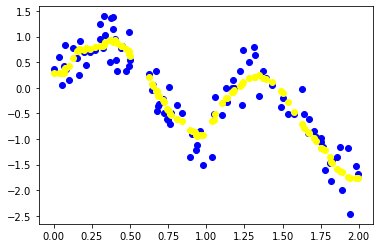

In [233]:
plt.scatter(x_test, y_test, c="blue")
plt.scatter(x_test, predicted_y, c="yellow")

To find best K for this algorithm we suggest to use cross-validation.
<br><br/>
Did this model perform well (due to the plot and test accuracy)?

Yes. It performs better than Linear Regression and it has almost equal acurracy to Locally Weighted Linear Regression.